# Workflow to test the parameter convergence - Example

In this workflow the convergence of the following parameters is tested:
- **k** point sampling (shrinking factor)
- grid size
- tolinteg

The effect on the total energy and band gap (for non metals):
- functional
- basis set

Please insert the parameters and variables in the cells below. Each function displays a data frame (and graph). In addition, a numpy array is return (but not displayed). This array can be called for further data analysis by typing its name (such as "k_energy_arr" in a new cell. 

In [2]:
#Import system 
import sys
sys.path.insert(1, '../../functions/')
sys.path.insert(1, '../')
import nbimporter
from os.path import join

#Import from functions
from crystal_io import read_input

#Import other notebooks
from building_blocks import k_point_convergence
from building_blocks import grid_size_convergence
from building_blocks import tolinteg_convergence
from building_blocks import functional_choice
from building_blocks import basis_set

#Import other modules
import re
import numpy as np
import pandas as pd
import time

### Setting the variables

In [3]:
#INPUT/OUTPUT VARIABLES
directory = '../data/convergence' # directory where the original input is saved
input_name = 'mgo.d12' # name of the original input
file_path = join(directory,input_name)

#K POINT SAMPLING
# first k point grid size to be sampled
initial = 6 
# last k point grid size to be sampled
final = 21 
# sampling step
step = 1 
sample = [i for i in range(initial,final,step)]

#TOLINTEG
# first tolinteg value to be sampled
initial = 6 
# last tolinteg value to be sampled
final = 13 
# sampling step
step = 1 
sample_tol = [i for i in range(initial,final,step)]

#FUNCTIONAL CHOICE
functionals = [['PBE','PBE'],'B3LYP','PBE0']

#BASIS SET
basis_sets = [['Mg_8-511G_harrison_1994','O_8-411_muscat_1999'],['Mg_8-511d1G_valenzano_2006','O_8-411d11G_valenzano_2006']]

#SPIN (is the structure spin polarised?)
spin_pol = False

# RUN 
# (set to False if you only wish to generate the inputs and not run the calculation)
run = True

#Delete the wave function files after running the calculation
clean = True

### k point sampling

,Final Energy,Delta E,Time
Shrink,,,
6,-7.495E+03,-,9.518E+00
7,-7.495E+03,8.451E-05,9.675E+00
8,-7.495E+03,1.317E-05,1.015E+01
9,-7.495E+03,2.078E-06,9.912E+00
10,-7.495E+03,4.680E-07,9.738E+00
11,-7.495E+03,9.388E-08,9.754E+00
12,-7.495E+03,2.259E-08,9.944E+00
13,-7.495E+03,4.082E-09,1.008E+01
14,-7.495E+03,1.904E-09,1.011E+01


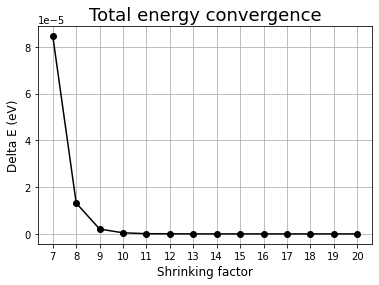

In [5]:
geom_block,optgeom_block,bs_block,func_block,scf_block = read_input(file_path)
if run != False:
    k_energy_df, k_energy_arr = k_point_convergence.kpc(directory,input_name,sample,geom_block,bs_block,func_block,scf_block,run,clean)
    display(k_energy_df)
else:
    display(k_point_convergence.kpc(directory,input_name,sample,geom_block,bs_block,func_block,scf_block,run,clean))

### grid size

In [6]:
geom_block,optgeom_block,bs_block,func_block,scf_block = read_input(file_path)
if run != False:
    g_energy_df, g_energy_arr = grid_size_convergence.gsc(directory,input_name,geom_block,bs_block,func_block,scf_block,run,clean)
    display(g_energy_df)
else:
    display(grid_size_convergence.gsc(directory,input_name,geom_block,bs_block,func_block,scf_block,run,clean))

,Energy,Delta E,Time
Grid,,,
LGRID,-7.495E+03,-,1.111E+01
XLGRID,-7.495E+03,-9.310E-03,1.171E+01
XXLGRID,-7.495E+03,6.603E-04,1.197E+01


### tolinteg

,Final Energy,Delta E,Time
Tolinteg,,,
6,-7.495E+03,-,6.659E+00
7,-7.495E+03,-1.667E-03,9.839E+00
8,-7.495E+03,1.153E-04,1.295E+01
9,-7.495E+03,1.733E-02,1.920E+01
10,-7.495E+03,-6.112E-04,2.705E+01
11,-7.495E+03,-1.287E-03,3.641E+01
12,-7.495E+03,-8.019E-04,4.887E+01


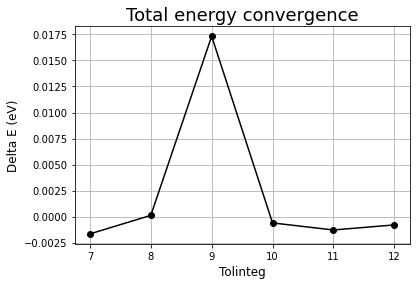

In [7]:
geom_block,optgeom_block,bs_block,func_block,scf_block = read_input(file_path)
if run != False:
    t_energy_df, t_energy_arr = tolinteg_convergence.tc(directory,input_name,geom_block,bs_block,func_block,scf_block,sample_tol,run,clean)
    display(t_energy_df)
else:
    display(tolinteg_convergence.tc(directory,input_name,geom_block,bs_block,func_block,scf_block,sample_tol,run,clean))

### functional

In [11]:
geom_block,optgeom_block,bs_block,func_block,scf_block = read_input(file_path)
if run != False:
    f_energy_df, f_energy_arr = functional_choice.fc(directory,input_name,geom_block,bs_block,func_block,scf_block,functionals,spin_pol,run,clean)
    display(f_energy_df)
else:
    display(functional_choice.fc(directory,input_name,geom_block,bs_block,func_block,scf_block,functionals,spin_pol,run,clean))

,Energy,Band Gap (eV),Time
Functional,,,
PBE_PBE,-7.491E+03,4.936E+00,6.436E+00
B3LYP,-7.495E+03,7.124E+00,1.177E+01
PBE0,-7.492E+03,7.404E+00,1.174E+01


### basis set

In [5]:
geom_block,optgeom_block,bs_block,func_block,scf_block = read_input(file_path)
if run != False:
    b_energy_df, b_energy_arr = basis_set.bs(directory,input_name,geom_block,func_block,scf_block,basis_sets,spin_pol,run,clean)
    display(b_energy_df)
else:
    display(basis_set.bs(directory,input_name,geom_block,func_block,scf_block,basis_sets,spin_pol,run,clean))

,Energy,Band Gap (eV),Time
Basis set,,,
Mg_8-511G_harrison_1994 O_8-411_muscat_1999,-7.495E+03,7.076E+00,1.180E+01
Mg_8-511d1G_valenzano_2006 O_8-411d11G_valenzano_2006,-7.496E+03,7.241E+00,2.864E+01
